In [5]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [6]:
import pandas as pd 
df = pd.read_csv("gas_turbines.csv")

In [7]:
df.shape

(15039, 11)

In [8]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [10]:
# finding null values 
df.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
 # finding duplicate rows
 df.duplicated().sum()

0

In [12]:
# finding duplicate columns
df.columns.duplicated().sum()

0

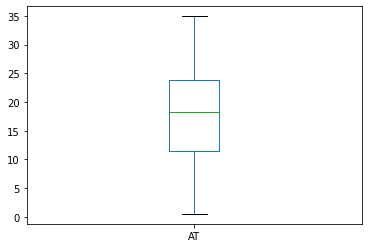

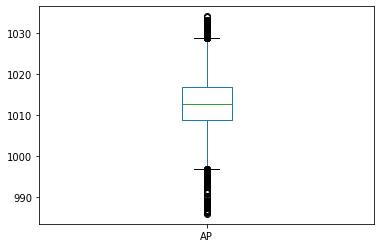

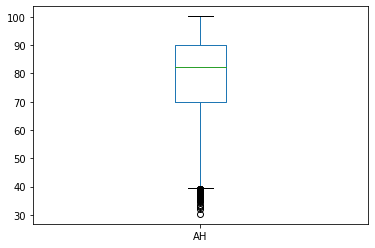

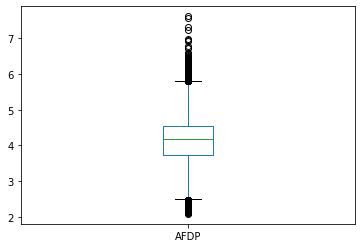

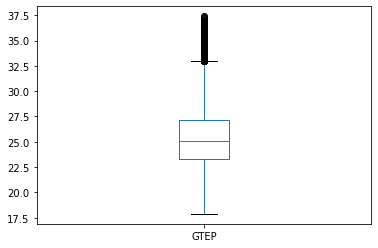

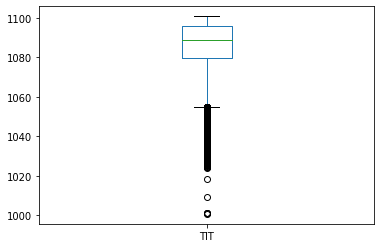

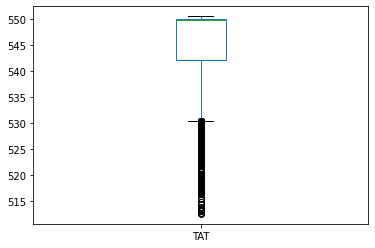

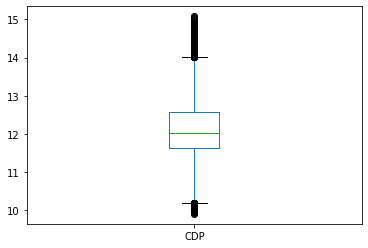

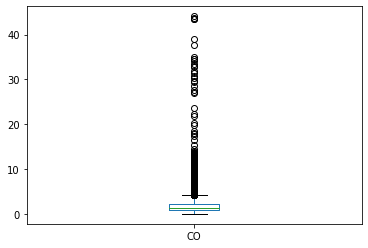

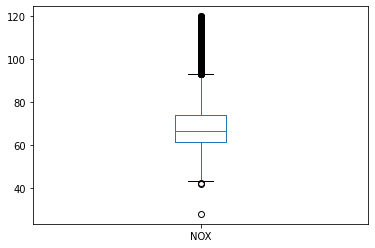

(11352, 11)

In [13]:
# Data visualization
# Boxplot
import matplotlib.pyplot as plt
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

plot_boxplot(df,"AT")
plot_boxplot(df,"AP")
plot_boxplot(df,"AH")
plot_boxplot(df,"AFDP")
plot_boxplot(df,"GTEP")
plot_boxplot(df,"TIT")
plot_boxplot(df,"TAT")
plot_boxplot(df,"CDP")
plot_boxplot(df,"CO")
plot_boxplot(df,"NOX")

def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  ls = df.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]
  return ls

index_list=[]
for feature in ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"]:
  index_list.extend(outliers(df,feature))

index_list

def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df
df_cleaned = remove(df,index_list)
df_cleaned.shape
 


In [14]:
# Standardizaton
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_new = SS.fit_transform(df_cleaned)


In [15]:
df_new = pd.DataFrame(df_new,columns=(df.columns))

In [16]:
df_new

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.660285,-0.858368,1.334043,-1.043930,-1.810179,-2.258625,0.459165,-1.689526,-1.808411,2.041825,1.788323
1,-1.670373,-0.770287,1.356849,-1.044261,-1.789137,-2.250305,0.459165,-1.687767,-1.817028,2.140766,1.794539
2,-1.655092,-0.699823,1.272562,-1.073003,-1.772627,-2.241984,0.434633,-1.688646,-1.813335,2.098207,1.759089
3,-1.633506,-0.629359,1.223233,-1.076141,-1.768418,-2.225344,0.457277,-1.687767,-1.807180,2.087416,1.782338
4,-1.587283,-0.541279,1.216155,-1.047895,-1.777159,-2.217023,0.455390,-1.687767,-1.799794,2.155438,1.741019
...,...,...,...,...,...,...,...,...,...,...,...
11347,-1.228486,-1.140225,0.391225,-0.562916,-1.212903,-1.409949,0.457277,-1.087882,-1.216312,2.647478,1.385946
11348,-1.198927,-1.140225,0.193983,-0.583894,-1.064959,-1.343386,0.306314,-0.890853,-1.091984,1.033737,1.431984
11349,-1.202182,-1.439697,1.562527,-0.415407,-1.310668,-1.568036,0.519550,-1.112511,-1.319714,1.465030,1.128014
11350,-1.187402,-1.386849,1.575038,0.310244,-0.390635,-0.170217,0.455390,-0.014775,-0.478958,-0.126644,0.847409


In [17]:
# split the variables into X and Y
X = df_new.drop("TEY",axis=1)
Y = df_cleaned["TEY"]

In [18]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.660285,-0.858368,1.334043,-1.043930,-1.810179,-2.258625,0.459165,-1.808411,2.041825,1.788323
1,-1.670373,-0.770287,1.356849,-1.044261,-1.789137,-2.250305,0.459165,-1.817028,2.140766,1.794539
2,-1.655092,-0.699823,1.272562,-1.073003,-1.772627,-2.241984,0.434633,-1.813335,2.098207,1.759089
3,-1.633506,-0.629359,1.223233,-1.076141,-1.768418,-2.225344,0.457277,-1.807180,2.087416,1.782338
4,-1.587283,-0.541279,1.216155,-1.047895,-1.777159,-2.217023,0.455390,-1.799794,2.155438,1.741019
...,...,...,...,...,...,...,...,...,...,...
11347,-1.228486,-1.140225,0.391225,-0.562916,-1.212903,-1.409949,0.457277,-1.216312,2.647478,1.385946
11348,-1.198927,-1.140225,0.193983,-0.583894,-1.064959,-1.343386,0.306314,-1.091984,1.033737,1.431984
11349,-1.202182,-1.439697,1.562527,-0.415407,-1.310668,-1.568036,0.519550,-1.319714,1.465030,1.128014
11350,-1.187402,-1.386849,1.575038,0.310244,-0.390635,-0.170217,0.455390,-0.478958,-0.126644,0.847409


In [19]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15023    121.54
15024    123.78
15031    121.26
15032    133.74
15033    115.52
Name: TEY, Length: 11352, dtype: float64

In [20]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=22) 

In [21]:
X_train.shape, X_test.shape

((7946, 10), (3406, 10))

In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [119]:
model = Sequential()
model.add(Dense(15,input_dim=10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="linear"))

In [120]:
# loss function
model.compile(loss="mean_squared_error",optimizer="RMSprop",metrics=["mean_squared_error"])

# train the model
history1 = model.fit(X_train,Y_train,validation_split=0.30, epochs=100, batch_size=20)

Epoch 1/100
279/279 [==============================] - 1s 3ms/step - loss: 17140.3887 - mean_squared_error: 17140.3887 - val_loss: 15094.8623 - val_mean_squared_error: 15094.8623
Epoch 2/100
279/279 [==============================] - 1s 3ms/step - loss: 11265.5039 - mean_squared_error: 11265.5039 - val_loss: 6606.0615 - val_mean_squared_error: 6606.0615
Epoch 3/100
279/279 [==============================] - 1s 3ms/step - loss: 3476.4941 - mean_squared_error: 3476.4941 - val_loss: 1667.1682 - val_mean_squared_error: 1667.1682
Epoch 4/100
279/279 [==============================] - 1s 2ms/step - loss: 923.3831 - mean_squared_error: 923.3831 - val_loss: 487.8091 - val_mean_squared_error: 487.8091
Epoch 5/100
279/279 [==============================] - 1s 3ms/step - loss: 315.8560 - mean_squared_error: 315.8560 - val_loss: 218.1890 - val_mean_squared_error: 218.1890
Epoch 6/100
279/279 [==============================] - 1s 2ms/step - loss: 169.5915 - mean_squared_error: 169.5915 - val_loss: 

In [121]:
model.evaluate(X_train,Y_train)

249/249 [==============================] - 0s 2ms/step - loss: 1.0976 - mean_squared_error: 1.0976


[1.0976226329803467, 1.0976226329803467]

In [122]:
model.evaluate(X_test,Y_test)

107/107 [==============================] - 0s 2ms/step - loss: 1.0599 - mean_squared_error: 1.0599


[1.0598745346069336, 1.0598745346069336]

In [123]:
Y_pred = model.predict(X_test)
print(Y_pred[:10])

107/107 [==============================] - 0s 1ms/step
[[145.3136 ]
 [135.15854]
 [149.91211]
 [114.09246]
 [136.3378 ]
 [141.07654]
 [129.05331]
 [135.08334]
 [153.43944]
 [134.84601]]


In [124]:
Y_test[:10]

11915    144.08
8700     135.20
13030    149.67
12135    112.53
13055    135.76
8662     141.63
13963    128.32
14630    134.69
13506    152.03
8027     134.12
Name: TEY, dtype: float64

In [125]:
history1.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

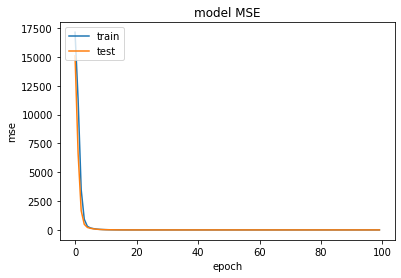

In [126]:
import matplotlib.pyplot as plt
plt.plot(history1.history["mean_squared_error"])
plt.plot(history1.history["val_mean_squared_error"])
plt.title("model MSE")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [127]:
# Dropout the layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [129]:
modeld = Sequential()
modeld.add(Dense(15,input_dim=10,activation="relu"))
modeld.add(Dropout(0.5))
modeld.add(Dense(10,activation="relu"))
modeld.add(Dropout(0.5))
modeld.add(Dense(1,activation="linear"))

In [130]:
# loss function
modeld.compile(loss="mean_squared_error",optimizer="RMSprop",metrics=["mean_squared_error"])

# train the model
history2 = modeld.fit(X_train,Y_train,validation_split=0.30, epochs=100, batch_size=20)

Epoch 1/100
279/279 [==============================] - 1s 3ms/step - loss: 17340.7168 - mean_squared_error: 17340.7168 - val_loss: 16023.8184 - val_mean_squared_error: 16023.8184
Epoch 2/100
279/279 [==============================] - 1s 3ms/step - loss: 13837.2402 - mean_squared_error: 13837.2402 - val_loss: 10288.1104 - val_mean_squared_error: 10288.1104
Epoch 3/100
279/279 [==============================] - 1s 3ms/step - loss: 8507.4277 - mean_squared_error: 8507.4277 - val_loss: 4246.0044 - val_mean_squared_error: 4246.0044
Epoch 4/100
279/279 [==============================] - 1s 2ms/step - loss: 6185.7051 - mean_squared_error: 6185.7051 - val_loss: 2493.6208 - val_mean_squared_error: 2493.6208
Epoch 5/100
279/279 [==============================] - 1s 2ms/step - loss: 5525.4429 - mean_squared_error: 5525.4429 - val_loss: 1878.6573 - val_mean_squared_error: 1878.6573
Epoch 6/100
279/279 [==============================] - 1s 5ms/step - loss: 4877.9849 - mean_squared_error: 4877.9849 

In [131]:
modeld.evaluate(X_train,Y_train)

249/249 [==============================] - 0s 2ms/step - loss: 235.1452 - mean_squared_error: 235.1452


[235.14520263671875, 235.14520263671875]

In [132]:
modeld.evaluate(X_test,Y_test)

107/107 [==============================] - 0s 2ms/step - loss: 236.6685 - mean_squared_error: 236.6685


[236.66847229003906, 236.66847229003906]

In [133]:
history2.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

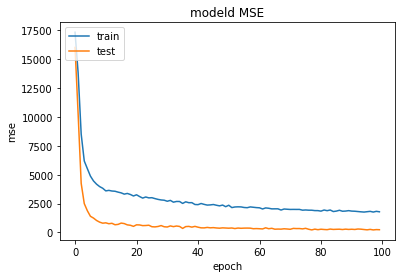

In [135]:
import matplotlib.pyplot as plt
plt.plot(history2.history["mean_squared_error"])
plt.plot(history2.history["val_mean_squared_error"])
plt.title("modeld MSE")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
# by comparing both the models 1st model (with out droping the layres) is giving the best results 